# Exploratory Data Analysis

#### This data analysis seeks to explore the Social conflicts that have occured in selected 7 countries of the world according to the data source.
#### There are many variables to evaluate. These variables are mostly categocrical variables with numerical coding representing an idea.
#### I recoded the numbers to align with the values thy represent. Hence making them object data types.
#### During the cause of data transportation in a pipeline medium, parts of the dataset was lost such as the involvement of  Lesbian, Gay, Bisexual, Transgender, or Queer/Questioning
#### (LGBTQ) community in the social crises examined.
#### Data source is https://www.strausscenter.org/
#### Codebook is located @ https://www.strausscenter.org/wp-content/uploads/SCAD_33_Codebook.pdf
#### According to the result of the analysis, Nigeria had the highest records in all the variables such as whether the government employed repreesion or not.

In [444]:
df['CountryName'].value_counts()

Nigeria               2021
Mexico                1885
Egypt                 1566
Haiti                 1144
South Africa          1085
Kenya                  643
Dominican Republic     173
Name: CountryName, dtype: int64

In [1]:
#Loading relevant libraries

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [267]:
#Loading the data set

df = pd.read_csv('sca.csv')

In [268]:
#Removing column display limit

pd.set_option('display.max_columns', None)

In [269]:
#First five rows of the data set

df.head(3)

ccode  year  eventid  id countryname  etype startdate  enddate  stday  \
0     41  1990   410037  37       Haiti      5   1/12/90  1/12/90     12   
1     41  1990   410038  38       Haiti      1    3/5/90   3/5/90      5   
2     41  1990   410039  39       Haiti      2    3/6/90  3/10/90      6   

   stmo  styr  eday  emo   eyr  duration  \
0     1  1990    12    1  1990         1   
1     3  1990     5    3  1990         1   
2     3  1990    10    3  1990         5   

                                     actor1   actor1id  actor1coherent  \
0  Radical People's Power Youth Association  41.13.820             1.0   
1         Confederation of Democratic Unity  41.04.315             1.0   
2                                  Students      41.09             0.0   

                                       actor2 actor2id  actor2coherent  \
0  20 opposition political parties and unions  41.0407             0.0   
1          Political parties and civic groups    41.04             0.0   
2                           Opposition groups    41.04             0.0   

           actor3 actor3id  actor3coherent     target1 target1id  \
0             NaN      NaN             NaN  Government     41.01   
1             NaN      NaN             NaN  Government     41.01   
2  Other citizens    41.15             0.0  Government     41.01   

   target1coherent target2 target2id  target2coherent  cgovtarget  rgovtarget  \
0              0.0     NaN       NaN              NaN           1           0   
1              0.0     NaN       NaN              NaN           1           0   
2              0.0     NaN       NaN              NaN           1           0   

   npart  ndeath  repress                                             elocal  \
0    -99       0        1                                         Nationwide   
1    -99       1        2                                        Petit Goave   
2      5     -77        2  Gonaives; Port-Au-Prince; Cap-Haitien; Petit G...   

        ilocal  sublocal  locnum  gislocnum  issue1  issue2  issue3  \
0   Nationwide         1       7          7      10     NaN     NaN   
1  Petit Goave         1       3          3      10     NaN     NaN   
2     Gonaives         1       7          8      10     NaN     NaN   

                                           issuenote nsource  \
0  24 hour general strike was called to protest t...      AP   
1  18 political parties and civic groups proteste...      AP   
2  Thousands of students and other citizens prote...      AP   

   acd_questionable                                              notes  \
0               0.0  Coded as nationwide because it was a general s...   
1               0.0                                                NaN   
2               0.0                                                NaN   

   escalation  latitude  longitude geo_comments location_precision  
0           0        19        -72          NaN                NaN  
1           0        18        -73          NaN                NaN  
2           4        18        -73          NaN                NaN

In [271]:
#Checking for null values

df.isna().sum()

ccode                    0
year                     0
eventid                  0
id                       0
countryname              0
etype                    0
startdate                0
enddate                  0
stday                    0
stmo                     0
styr                     0
eday                     0
emo                      0
eyr                      0
duration                 0
actor1                   1
actor1id                 1
actor1coherent           1
actor2                7913
actor2id              7913
actor2coherent        7913
actor3                8423
actor3id              8424
actor3coherent        8424
target1                  2
target1id                1
target1coherent          1
target2               7451
target2id             7451
target2coherent       7451
cgovtarget               0
rgovtarget               0
npart                    0
ndeath                   0
repress                  0
elocal                   0
ilocal                   0
s

In [ ]:
#DROPPING COLUMNS WITH NAN VALUES OF OVER 2000

In [272]:
#Dropping a columns

df.drop(columns  = ['actor3'],axis = 1, inplace =True)

In [273]:
#Dropping more columns

df.drop(columns = ['location_precision', 'geo_comments', 'notes', 'acd_questionable', 'issue3', 'issue2', 'target2coherent', 'target2id', 'target2', 'actor3coherent', 'actor3id', 'actor2coherent', 'actor2id', 'actor2'], axis = 1, inplace = True)

In [274]:
#Checking for the existence of more null values

df.isna().sum()

ccode              0
year               0
eventid            0
id                 0
countryname        0
etype              0
startdate          0
enddate            0
stday              0
stmo               0
styr               0
eday               0
emo                0
eyr                0
duration           0
actor1             1
actor1id           1
actor1coherent     1
target1            2
target1id          1
target1coherent    1
cgovtarget         0
rgovtarget         0
npart              0
ndeath             0
repress            0
elocal             0
ilocal             0
sublocal           0
locnum             0
gislocnum          0
issue1             0
issuenote          7
nsource            1
escalation         0
latitude           0
longitude          0
dtype: int64

In [275]:
#Droping more left over NaN values

df.dropna(inplace  =True)

In [276]:
#Viewing the columns and row numbers

df.shape

(8517, 37)

In [277]:
#Displaying the metadata of the data set

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8517 entries, 0 to 8527
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ccode            8517 non-null   int64  
 1   year             8517 non-null   int64  
 2   eventid          8517 non-null   int64  
 3   id               8517 non-null   int64  
 4   countryname      8517 non-null   object 
 5   etype            8517 non-null   int64  
 6   startdate        8517 non-null   object 
 7   enddate          8517 non-null   object 
 8   stday            8517 non-null   int64  
 9   stmo             8517 non-null   int64  
 10  styr             8517 non-null   int64  
 11  eday             8517 non-null   int64  
 12  emo              8517 non-null   int64  
 13  eyr              8517 non-null   int64  
 14  duration         8517 non-null   int64  
 15  actor1           8517 non-null   object 
 16  actor1id         8517 non-null   object 
 17  actor1coherent

In [323]:
#Staistical description of the data set

df.describe()

ccode         year       eventid           id        stday  \
count  8517.000000  8517.000000  8.517000e+03  8517.000000  8517.000000   
mean    363.426559  2006.481273  3.635086e+06   820.063755    15.375015   
std     244.204595     7.496956  2.442021e+06   543.203798     8.786627   
min      41.000000  1990.000000  4.100370e+05     1.000000     1.000000   
25%      70.000000  2001.000000  7.008380e+05   368.000000     8.000000   
50%     475.000000  2009.000000  4.751106e+06   735.000000    15.000000   
75%     560.000000  2013.000000  5.600529e+06  1197.000000    23.000000   
max     651.000000  2016.000000  6.511649e+06  2180.000000    31.000000   

              stmo         styr         eday          emo          eyr  \
count  8517.000000  8517.000000  8517.000000  8517.000000  8517.000000   
mean      6.353411  2006.481273    15.544323     6.387578  2006.484560   
std       3.476862     7.496956     8.784958     3.475770     7.494755   
min       1.000000  1990.000000     1.000000     1.000000  1990.000000   
25%       3.000000  2001.000000     8.000000     3.000000  2001.000000   
50%       6.000000  2009.000000    15.000000     6.000000  2009.000000   
75%       9.000000  2013.000000    23.000000    10.000000  2013.000000   
max      12.000000  2016.000000    31.000000    12.000000  2016.000000   

          duration  actor1coherent  target1coherent       ndeath  sublocal  \
count  8517.000000     8517.000000      8517.000000  8517.000000    8517.0   
mean      3.379711        0.187038         0.219091     5.599624       1.0   
std      16.455014        0.389965         0.413655    54.396908       0.0   
min       1.000000        0.000000         0.000000   -99.000000       1.0   
25%       1.000000        0.000000         0.000000     0.000000       1.0   
50%       1.000000        0.000000         0.000000     0.000000       1.0   
75%       1.000000        0.000000         0.000000     3.000000       1.0   
max     560.000000        1.000000         1.000000  3000.000000       1.0   

         gislocnum     latitude    longitude  
count  8517.000000  8517.000000  8517.000000  
mean      1.175179    11.813784   -19.415287  
std      13.085282    17.865339    55.555382  
min     -99.000000   -35.000000  -117.000000  
25%       1.000000     6.000000   -72.000000  
50%       2.000000    19.000000     8.000000  
75%       3.000000    25.000000    31.000000  
max       8.000000    33.000000    42.000000

In [331]:
#Columns of the data set

df.columns

Index(['CountryCode', 'Year', 'EventId', 'Id', 'CountryName', 'CrisesType',
       'StartDate', 'EndDate', 'StartDate', 'StartMonth', 'StartYear',
       'EndDay', 'EndMonth', 'EndYear', 'Duration_In_Days', 'Actor1',
       'Actor1ID', 'Actor1Coherent', 'Target1', 'Target1ID', 'Target1Coherent',
       'GovernmentTarget', 'Reg_Pro_LovGovtTarget', 'NumberofPartcipants',
       'NumberofDead', 'Repression', 'NameofLocality', 'Ilocal', 'SubLocal',
       'LocationNumber', 'GisLocationNumber', 'IssueType', 'IssueNote',
       'IssueSource', 'Escalated', 'Latitude', 'Longitude'],
      dtype='object')

In [279]:
#Changing and recoding columns values.

df['issue1'] = df['issue1'].astype(str)
df['issue1'] = df['issue1'].map({"1":'elections', "2": 'economy, jobs', "3": 'food, water, subsistence', "4": 'environmental degradation',"5": 'ethnic discrimination, ethnic issues', "6": 'religious discrimination, religious issues', "7": 'education',"8": 'foreign affairs/relations', "9":'domestic war, violence, terrorism', "10":'human rights, democracy', "11": 'pro-government', "12": 'economic resources/assets', "13": 'other', "14": 'unknown, not-specified'})

In [280]:
#Changing and recoding columns values.

df['etype'] = df['etype'].astype(str)
df['etype'] = df['etype'].map({"1":"Organized Demonstration", "2":"Spontaneous Demonstration", "3":"Organized Violent Riot", "4":"Spontaneous Violent Riot", "5":"General Strike", 
                              "6":"Limited Strike", "7":"Pro-Government Violence (Repression)", "8":"Anti-Government Violence", "9": "Extra-government Violence", "10": "Intra-government Violence"})

In [281]:
#Changing and recoding columns values.

df['escalation'] = df['escalation'].astype(str)
df['escalation'] = df['escalation'].map({"0": "No Escalation", "1":"Organized Demonstration", "2":"Spontaneous Demonstration", "3":"Organized Violent Riot", "4":"Spontaneous Violent Riot", "5":"General Strike", 
                              "6":"Limited Strike", "7":"Pro-Government Violence (Repression)", "8":"Anti-Government Violence", "9": "Extra-government Violence", "10": "Intra-government Violence"})

In [282]:
#Changing and recoding columns values.

df['cgovtarget'] = df['cgovtarget'].astype(str)
df['cgovtarget'] = df['cgovtarget'].map({"1": "Central government was the target", "0": "Central government was NOT the target"})

In [283]:
#Changing and recoding columns values.

df['rgovtarget'] = df['rgovtarget'].astype(str)
df['rgovtarget'] = df['rgovtarget'].map({"1": "Regional, Provincial and Local governments were targets", "0": "Regional, Provincial and Local governments were NOT targets"})

In [284]:
#Changing and recoding columns values.

df['npart'] = df['npart'].astype(str)
df['npart'] = df['npart'].map({"1": "Less than Ten (10)", "2": "Less than One hundred(-100)", "3": "Less than One Thousand(-1,000)",
                              "4": "Less than Ten Thousand(-10,000)", "5": "Less than One hundred Thousand(-100,000)", 
                              "6": "Less than One Million(-1,000,000)", "7": "Over 1000000", "-99": "Unknown Number"})

In [285]:
#Changing and recoding columns values.

df['repress'] = df['repress'].astype(str)
df['repress'] = df['repress'].map({"0": "No repression used", "1": "non-lethal repression used (e.g. tear gas, arrests, etc)", "2": "lethal repression used (there must be deaths reported)"})

In [286]:
#Changing and recoding columns values.

df['locnum'] = df['locnum'].astype(str)
df['locnum'] = df['locnum'].map({"1": "Capital city", "2": "Other major urban area (population greater than 100,000)", "3": "Rural (including small towns, villages with population less than 100,000)",
                              "4": "Multiple urban areas", "5": "Multiple rural areas", 
                              "6": "Province/region listed, exact location unknown","7": "Nationwide. Effects several cities and rural areas", "-99": "location unknown"})

In [329]:
#Changing column headers

df.rename(columns = {'ccode':'CountryCode', 'year':'Year', 'eventid':'EventId', 'id':'Id', 'countryname':'CountryName', 'etype':'CrisesType', 'startdate':'StartDate',
       'enddate':'EndDate', 'stday':'StartDate', 'stmo':'StartMonth', 'styr':'StartYear', 'eday':'EndDay', 'emo':'EndMonth', 'eyr':'EndYear', 'duration':'Duration_In_Days',
       'actor1':'Actor1', 'actor1id':'Actor1ID', 'actor1coherent':'Actor1Coherent', 'target1':'Target1', 'target1id':'Target1ID',
       'target1coherent':'Target1Coherent', 'cgovtarget':'GovernmentTarget', 'rgovtarget':'Reg_Pro_LovGovtTarget', 'npart':'NumberofPartcipants', 'ndeath':'NumberofDead',
       'repress':'Repression', 'elocal':'NameofLocality', 'ilocal':'Ilocal', 'sublocal':'SubLocal', 'locnum':'LocationNumber', 'gislocnum':'GisLocationNumber',
       'issue1':'IssueType', 'issuenote':'IssueNote', 'nsource':'IssueSource', 'escalation':'Escalated', 'latitude':'Latitude',
       'longitude':'Longitude'},inplace = True)

In [332]:
#Viewing the first 3 rows of the data after cleaning it.

df.head(3)

CountryCode  Year  EventId  Id CountryName                 CrisesType  \
0           41  1990   410037  37       Haiti             General Strike   
1           41  1990   410038  38       Haiti    Organized Demonstration   
2           41  1990   410039  39       Haiti  Spontaneous Demonstration   

   StartDate  EndDate  StartDate  StartMonth  StartYear  EndDay  EndMonth  \
0    1/12/90  1/12/90         12           1       1990      12         1   
1     3/5/90   3/5/90          5           3       1990       5         3   
2     3/6/90  3/10/90          6           3       1990      10         3   

   EndYear  Duration_In_Days                                    Actor1  \
0     1990                 1  Radical People's Power Youth Association   
1     1990                 1         Confederation of Democratic Unity   
2     1990                 5                                  Students   

    Actor1ID  Actor1Coherent     Target1 Target1ID  Target1Coherent  \
0  41.13.820             1.0  Government     41.01              0.0   
1  41.04.315             1.0  Government     41.01              0.0   
2      41.09             0.0  Government     41.01              0.0   

                    GovernmentTarget  \
0  Central government was the target   
1  Central government was the target   
2  Central government was the target   

                               Reg_Pro_LovGovtTarget  \
0  Regional, Provincial and Local governments wer...   
1  Regional, Provincial and Local governments wer...   
2  Regional, Provincial and Local governments wer...   

                        NumberofPartcipants  NumberofDead  \
0                            Unknown Number             0   
1                            Unknown Number             1   
2  Less than One hundred Thousand(-100,000)           -77   

                                          Repression  \
0  non-lethal repression used (e.g. tear gas, arr...   
1  lethal repression used (there must be deaths r...   
2  lethal repression used (there must be deaths r...   

                                      NameofLocality       Ilocal  SubLocal  \
0                                         Nationwide   Nationwide         1   
1                                        Petit Goave  Petit Goave         1   
2  Gonaives; Port-Au-Prince; Cap-Haitien; Petit G...     Gonaives         1   

                                      LocationNumber  GisLocationNumber  \
0  Nationwide. Effects several cities and rural a...                  7   
1  Rural (including small towns, villages with po...                  3   
2  Nationwide. Effects several cities and rural a...                  8   

                 IssueType                                          IssueNote  \
0  human rights, democracy  24 hour general strike was called to protest t...   
1  human rights, democracy  18 political parties and civic groups proteste...   
2  human rights, democracy  Thousands of students and other citizens prote...   

  IssueSource                 Escalated  Latitude  Longitude  
0          AP             No Escalation        19        -72  
1          AP             No Escalation        18        -73  
2          AP  Spontaneous Violent Riot        18        -73

In [399]:
#Grouping Crisis Start Year and Country Name by the Number of People that died.

df.groupby(['StartYear','CountryName']).sum()['NumberofDead'][:20].sort_values(ascending = False)

StartYear  CountryName       
1992       Nigeria               1882
1990       South Africa          1512
1991       South Africa           976
1992       South Africa           907
1991       Kenya                  823
           Nigeria                458
1992       Kenya                  190
1990       Kenya                   45
1992       Egypt                   32
1990       Egypt                   32
1992       Mexico                  30
1991       Mexico                  20
           Haiti                   18
1990       Mexico                  17
1991       Dominican Republic       3
1992       Dominican Republic       1
1991       Egypt                    1
1990       Dominican Republic       1
1992       Haiti                  -87
1990       Haiti                 -193
Name: NumberofDead, dtype: int64

In [401]:
fig = px.bar(df, x = 'CountryName', y = 'NumberofDead', color = 'NumberofDead', title = "Number of Dead by Country")
fig.show()

In [398]:
#Grouping by Start Month and Number of Dead.

df.groupby(['StartMonth']).sum()['NumberofDead'][:20].sort_values(ascending = False)

StartMonth
1     8050
5     5495
4     4954
3     4089
7     3656
12    3546
8     3472
2     3467
6     3053
9     2974
10    2602
11    2334
Name: NumberofDead, dtype: int64

In [402]:
#Plotting the Number of Dead by StartMonth
fig = px.bar(df, x = 'StartMonth', y = 'NumberofDead', color = 'NumberofDead', title = "Number of Dead by Crisis Month")
fig.show()

In [405]:
#Grouping the Number of Dead by Crisis Duration in Days.

df.groupby(['Duration_In_Days']).count()['NumberofDead'][:20].sort_values(ascending = False)

Duration_In_Days
1     6978
2      489
3      201
4      122
5       92
7       74
8       74
6       60
9       33
10      28
15      27
13      22
14      20
12      19
11      16
18      14
17      13
19      13
16       9
20       7
Name: NumberofDead, dtype: int64

<AxesSubplot:xlabel='Duration_In_Days'>

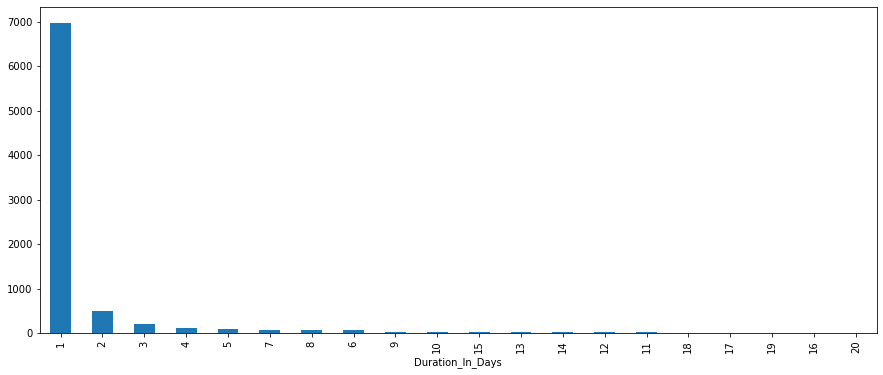

In [412]:
#Plotting the grouping the Number of Dead by Crisis Duration in Days.

df.groupby(['Duration_In_Days']).count()['NumberofDead'][:20].sort_values(ascending = False).plot(kind = 'bar',figsize = (15,6))

In [403]:
#Plotting the grouping the Number of Dead by Crisis Duration in Days.

fig = px.bar(df, x = 'Duration_In_Days', y = 'NumberofDead', color = 'NumberofDead', title = "Number of Dead by Number of Days Cirsis Lasted")
fig.show()

In [390]:
df.groupby(['CountryName']).sum()['Duration_In_Days'].sort_values(ascending = False)

CountryName
Nigeria               7236
Egypt                 6386
Mexico                5156
South Africa          4769
Kenya                 2920
Haiti                 1788
Dominican Republic     530
Name: Duration_In_Days, dtype: int64

In [413]:
fig = px.bar(df, x = 'CountryName', y = 'Duration_In_Days', color = 'Duration_In_Days', title = "Country Name by Count of Number of Days Cirsis Lasted")
fig.show()

In [395]:
df.groupby(['CountryName']).mean()['Duration_In_Days'].sort_values(ascending = False).round(0)

CountryName
Kenya                 5.0
South Africa          4.0
Egypt                 4.0
Nigeria               4.0
Dominican Republic    3.0
Mexico                3.0
Haiti                 2.0
Name: Duration_In_Days, dtype: float64

In [397]:
df.groupby(['CountryName']).std()['Duration_In_Days'].sort_values(ascending = False).round(0)

CountryName
Egypt                 24.0
Kenya                 22.0
Nigeria               16.0
Mexico                15.0
Dominican Republic    14.0
South Africa          11.0
Haiti                  5.0
Name: Duration_In_Days, dtype: float64

# The rest of the analysis below employed pivot tables to select and explore subsets of the data set with a special focus on Nigeria and South Africa.

In [337]:
df.pivot_table(index='CrisesType', columns='CountryName',aggfunc='count').fillna('')

Actor1                       \
CountryName                          Dominican Republic  Egypt  Haiti  Kenya   
CrisesType                                                                     
Anti-Government Violence                            6.0  353.0  121.0   62.0   
Extra-government Violence                          32.0  120.0  143.0  190.0   
General Strike                                     14.0    4.0   30.0    5.0   
Intra-government Violence                                  3.0                 
Limited Strike                                     26.0   70.0   39.0   46.0   
Organized Demonstration                                  166.0   78.0   71.0   
Organized Violent Riot                                     6.0   33.0   31.0   
Pro-Government Violence (Repression)                      34.0          12.0   
Spontaneous Demonstration                          42.0  502.0  406.0   82.0   
Spontaneous Violent Riot                           53.0  308.0  294.0  144.0   

                                                                  \
CountryName                          Mexico Nigeria South Africa   
CrisesType                                                         
Anti-Government Violence              459.0   342.0         28.0   
Extra-government Violence             726.0   683.0        357.0   
General Strike                          1.0    19.0         22.0   
Intra-government Violence                       1.0                
Limited Strike                         66.0   152.0        165.0   
Organized Demonstration               104.0    82.0        194.0   
Organized Violent Riot                  5.0    54.0         13.0   
Pro-Government Violence (Repression)           42.0          3.0   
Spontaneous Demonstration             324.0   238.0        168.0   
Spontaneous Violent Riot              200.0   408.0        135.0   

                                         Actor1Coherent                       \
CountryName                          Dominican Republic  Egypt  Haiti  Kenya   
CrisesType                                                                     
Anti-Government Violence                            6.0  353.0  121.0   62.0   
Extra-government Violence                          32.0  120.0  143.0  190.0   
General Strike                                     14.0    4.0   30.0    5.0   
Intra-government Violence                                  3.0                 
Limited Strike                                     26.0   70.0   39.0   46.0   
Organized Demonstration                                  166.0   78.0   71.0   
Organized Violent Riot                                     6.0   33.0   31.0   
Pro-Government Violence (Repression)                      34.0          12.0   
Spontaneous Demonstration                          42.0  502.0  406.0   82.0   
Spontaneous Violent Riot                           53.0  308.0  294.0  144.0   

                                                                  \
CountryName                          Mexico Nigeria South Africa   
CrisesType                                                         
Anti-Government Violence              459.0   342.0         28.0   
Extra-government Violence             726.0   683.0        357.0   
General Strike                          1.0    19.0         22.0   
Intra-government Violence                       1.0                
Limited Strike                         66.0   152.0        165.0   
Organized Demonstration               104.0    82.0        194.0   
Organized Violent Riot                  5.0    54.0         13.0   
Pro-Government Violence (Repression)           42.0          3.0   
Spontaneous Demonstration             324.0   238.0        168.0   
Spontaneous Violent Riot              200.0   408.0        135.0   

                                               Actor1ID                       \
CountryName                          Dominican Republic  Egypt  Haiti  Kenya   
CrisesType                           

In [349]:
df.pivot_table(index='CrisesType', columns='CountryName',aggfunc='count')['Escalated'][['Nigeria','South Africa']].sort_values(by = 'Nigeria', ascending = False).fillna('-')

CountryName                           Nigeria South Africa
CrisesType                                                
Extra-government Violence               683.0        357.0
Spontaneous Violent Riot                408.0        135.0
Anti-Government Violence                342.0         28.0
Spontaneous Demonstration               238.0        168.0
Limited Strike                          152.0        165.0
Organized Demonstration                  82.0        194.0
Organized Violent Riot                   54.0         13.0
Pro-Government Violence (Repression)     42.0          3.0
General Strike                           19.0         22.0
Intra-government Violence                 1.0            -

<AxesSubplot:xlabel='CrisesType'>

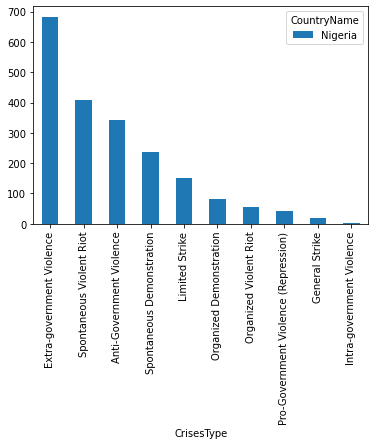

In [416]:
df.pivot_table(index='CrisesType', columns='CountryName',aggfunc='count')['Escalated'][['Nigeria','South Africa']].sort_values(by = 'Nigeria', ascending = False).fillna('-').plot(kind = 'bar')

In [415]:
fig = px.bar(df, x = 'CountryName', y = 'CrisesType', color = 'CrisesType', title = "Crises Type by Name of Country")
fig.show()

In [352]:
df.pivot_table(index='Actor1', columns='CountryName',aggfunc='count')['Escalated'][['Nigeria','South Africa']].sort_values(by = 'Nigeria', ascending = False).fillna('-')

CountryName       Nigeria South Africa
Actor1                                
Boko Haram          304.0            -
Citizens            142.0          8.0
Gunmen              125.0         59.0
Muslims              62.0            -
Suicide bomber       49.0            -
...                   ...          ...
students                -          4.0
sugar workers           -          1.0
taxi drivers            -          1.0
unidentified gang       -            -
union official          -          1.0

[2308 rows x 2 columns]

<AxesSubplot:title={'center':'Count of Actors by Name of Country'}, xlabel='Actor1'>

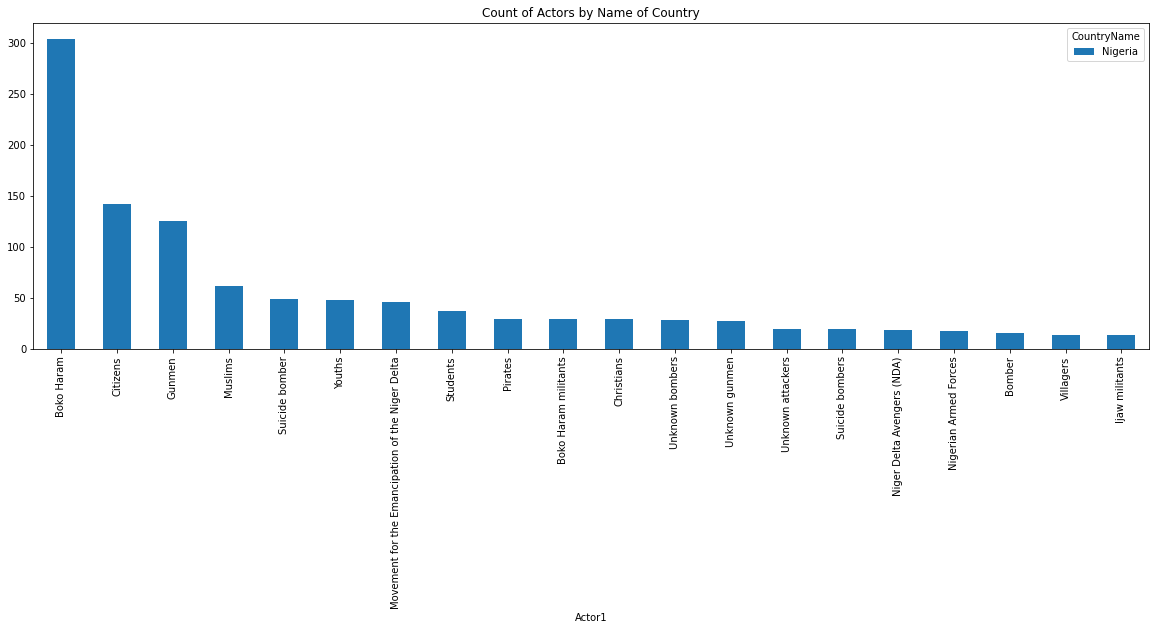

In [425]:
df.pivot_table(index='Actor1', columns='CountryName',aggfunc='count')['Escalated'][['Nigeria','South Africa']].sort_values(by = 'Nigeria', ascending = False)[:20].fillna('-').plot(kind = 'bar', figsize = (20,6),title = "Count of Actors by Name of Country")


In [353]:
df.pivot_table(index='Target1', columns='CountryName',aggfunc='count')['Escalated'][['Nigeria','South Africa']].sort_values(by = 'Nigeria', ascending = False).fillna('-')

CountryName              Nigeria South Africa
Target1                                      
Government                 318.0        182.0
Police                      72.0         37.0
Villagers                   71.0            -
villagers                   55.0            -
Shell                       55.0            -
...                          ...          ...
sugar producer companies       -          1.0
voters                         -            -
wamwala supporters             -            -
white Mine Workers Union       -          1.0
young men                      -          1.0

[2993 rows x 2 columns]

In [432]:
df.pivot_table(index='Target1', columns='CountryName',aggfunc='count')['Escalated'][['Nigeria','South Africa']].sort_values(by = 'Nigeria', ascending = False)[:15].fillna('-')
fig = px.bar(df, x = 'CountryName', y = 'Target1', color = 'Year', title = "Target1 by Name of Country")
fig.show()

In [354]:
df.pivot_table(index='GovernmentTarget', columns='CountryName',aggfunc='count')['Escalated'][['Nigeria','South Africa']].sort_values(by = 'Nigeria', ascending = False).fillna('-')

CountryName                            Nigeria  South Africa
GovernmentTarget                                            
Central government was NOT the target     1315           831
Central government was the target          706           254

In [355]:
df.pivot_table(index='Reg_Pro_LovGovtTarget', columns='CountryName',aggfunc='count')['Escalated'][['Nigeria','South Africa']].sort_values(by = 'Nigeria', ascending = False).fillna('-')

CountryName                                         Nigeria  South Africa
Reg_Pro_LovGovtTarget                                                    
Regional, Provincial and Local governments were...     1793          1006
Regional, Provincial and Local governments were...      228            79

In [384]:
df.pivot_table(index='NumberofPartcipants', columns='CountryName',aggfunc='count')['Escalated'][['Nigeria','South Africa']].sort_values(by = 'Nigeria', ascending = False).fillna('-')

CountryName                              Nigeria  South Africa
NumberofPartcipants                                           
Unknown Number                            1219.0         560.0
Less than One hundred(-100)                267.0          56.0
Less than One Thousand(-1,000)             204.0         161.0
Less than Ten (10)                         204.0          45.0
Less than Ten Thousand(-10,000)            102.0         155.0
Less than One hundred Thousand(-100,000)    20.0          77.0
Less than One Million(-1,000,000)            5.0          21.0
Over 1000000                                   -           9.0

<AxesSubplot:title={'center':'Number of Participants in Countries'}, xlabel='NumberofPartcipants'>

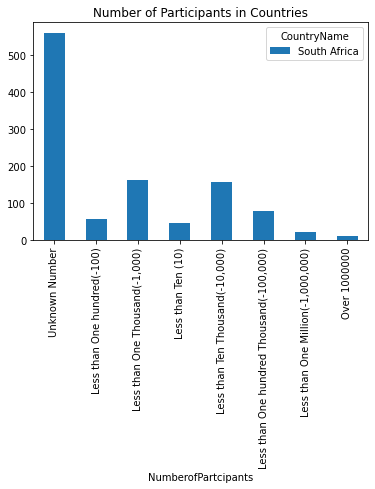

In [443]:
df.pivot_table(index='NumberofPartcipants', columns='CountryName',aggfunc='count')['Escalated'][['Nigeria','South Africa']].sort_values(by = 'Nigeria', ascending = False).fillna('-').plot(kind = 'bar', title = 'Number of Participants in Countries')

In [357]:
df.pivot_table(index='Repression', columns='CountryName',aggfunc='count')['Escalated'][['Nigeria','South Africa']].sort_values(by = 'Nigeria', ascending = False).fillna('-')

CountryName                                         Nigeria  South Africa
Repression                                                               
No repression used                                     1528           903
non-lethal repression used (e.g. tear gas, arre...      267           134
lethal repression used (there must be deaths re...      226            48

In [440]:
df.pivot_table(index='NameofLocality', columns='CountryName',aggfunc='count')['Escalated'][['Nigeria','South Africa']].sort_values(by = 'Nigeria', ascending = False)[:20].fillna('-')

CountryName     Nigeria South Africa
NameofLocality                      
Lagos             169.0            -
Nationwide        129.0        124.0
Maiduguri          96.0            -
Kano               70.0            -
Abuja              61.0            -
Niger Delta        57.0            -
Kano City          54.0            -
Port Harcourt      48.0            -
Jos                46.0            -
Warri              33.0            -
Potiskum           33.0            -
Kaduna             28.0            -
Bauchi             25.0            -
Gombe              19.0            -
Damaturu           16.0            -
Bayelsa State      16.0            -
Sokoto             15.0            -
Delta State        15.0            -
Yenagoa            13.0            -
Rivers State       11.0            -

In [370]:
df.pivot_table(index='Ilocal', columns='CountryName',aggfunc='count')['Escalated'][['Nigeria','South Africa']].sort_values(by = 'Nigeria', ascending = False)[:20].fillna('-')

CountryName    Nigeria South Africa
Ilocal                             
Lagos            180.0            -
Nationwide       129.0        121.0
Maiduguri         99.0            -
Kano              72.0            -
Abuja             63.0            -
Niger Delta       57.0            -
Kano City         54.0            -
Jos               49.0            -
Port Harcourt     48.0            -
Warri             37.0            -
Potiskum          33.0            -
Kaduna            29.0            -
Bauchi            28.0            -
Gombe             19.0            -
Damaturu          17.0            -
Delta State       16.0            -
Bayelsa State     16.0            -
Sokoto            15.0            -
Yenagoa           13.0            -
Bama              12.0            -

In [361]:
df.pivot_table(index='IssueType', columns='CountryName',aggfunc='count')['Escalated'][['Nigeria','South Africa']].sort_values(by = 'Nigeria', ascending = False).fillna('-')

CountryName                                 Nigeria  South Africa
IssueType                                                        
religious discrimination, religious issues    597.0           6.0
unknown, not-specified                        315.0         106.0
economic resources/assets                     201.0          55.0
ethnic discrimination, ethnic issues          163.0         214.0
economy, jobs                                 161.0         238.0
human rights, democracy                       141.0         114.0
elections                                     124.0          52.0
food, water, subsistence                      108.0          35.0
other                                          55.0         109.0
pro-government                                 51.0           4.0
domestic war, violence, terrorism              48.0          64.0
education                                      21.0          21.0
foreign affairs/relations                      19.0          65.0
environmental degradation                      17.0           2.0

In [362]:
df.pivot_table(index='IssueSource', columns='CountryName',aggfunc='count')['Escalated'][['Nigeria','South Africa']].sort_values(by = 'Nigeria', ascending = False).fillna('-')

CountryName  Nigeria  South Africa
IssueSource                       
0              533.0         493.0
1              505.0         357.0
AFP            480.0         129.0
Both           304.0          56.0
AP             179.0          44.0
both            20.0           6.0

In [365]:
df.pivot_table(index='Escalated', columns='CountryName',aggfunc='count')['GovernmentTarget'][['Nigeria','South Africa']].sort_values(by = 'Nigeria', ascending = False).fillna('-')

CountryName               Nigeria  South Africa
Escalated                                      
No Escalation              1917.0         944.0
Spontaneous Violent Riot     77.0          66.0
Anti-Government Violence     12.0           3.0
Extra-government Violence     5.0          11.0
Spontaneous Demonstration     4.0          15.0
Organized Violent Riot        3.0          19.0
General Strike                2.0           1.0
Organized Demonstration       1.0          22.0
Intra-government Violence       -           1.0
Limited Strike                  -           3.0

In [371]:
df.pivot_table(index='IssueNote', columns='CountryName',aggfunc='count')['Escalated'][['Nigeria','South Africa']].sort_values(by = 'Nigeria', ascending = False)[:20].fillna('-')

CountryName                                         Nigeria South Africa
IssueNote                                                               
University professors strike, demanding higher ...      5.0            -
Boko Haram attacks a village.                           5.0            -
Rival tribes clash over land disputes                   4.0            -
Militants demanding a greater share of oil weal...      4.0            -
Boko Haram attacked a police station                    4.0            -
Boko Haram attacked Nigerian Government                 3.0            -
NLC pickets major firms, demanding temporary wo...      3.0            -
The NDGJM bombed a pipeline to demand greater o...      3.0            -
Citizens protest high fuel prices                       3.0            -
Teachers strike, demanding higher wages                 3.0            -
Oil workers strike, demanding higher wages              3.0            -
Citizens strike, protesting hike in fuel prices         3.0            -
Citizens protest hike in fuel prices                    3.0            -
Tribes clash in revenge killings                        2.0            -
Citizens attack sect attempting to establish Ta...      2.0            -
Farmers and herders clash over land                     2.0            -
JRC militants attack a main oil pipeline.               2.0            -
Supporters of rival political parties clash ove...      2.0            -
Teachers strike, protesting new laws on primary...      2.0            -
Newspaper workers strike, demanding higher wages        2.0            -

In [374]:
df.pivot_table(index='StartYear', columns='CountryName',aggfunc='count')['GovernmentTarget'][['Nigeria','South Africa']].sort_values(by = 'Nigeria', ascending = False).fillna('-')

CountryName Nigeria  South Africa
StartYear                        
2014          236.0          36.0
2015          233.0          27.0
2012          222.0         121.0
2016          198.0          22.0
2011          111.0          13.0
2013           94.0          29.0
2010           86.0          16.0
2001           83.0          30.0
2004           79.0          18.0
2000           76.0          36.0
2002           76.0          16.0
2005           72.0          25.0
2003           67.0          17.0
2006           52.0          19.0
2007           48.0          19.0
1999           48.0          62.0
1998           38.0          40.0
1993           32.0          98.0
1997           29.0          25.0
2008           29.0          21.0
2009           29.0          26.0
1994           25.0          78.0
1996           23.0          49.0
1992           14.0          58.0
1995           11.0          48.0
1991           10.0          71.0
1990              -          65.0

In [321]:
df.pivot_table(index='etype', columns='countryname',aggfunc='count')['eday']['Nigeria']

etype
Anti-Government Violence                342.0
Extra-government Violence               683.0
General Strike                           19.0
Intra-government Violence                 1.0
Limited Strike                          152.0
Organized Demonstration                  82.0
Organized Violent Riot                   54.0
Pro-Government Violence (Repression)     42.0
Spontaneous Demonstration               238.0
Spontaneous Violent Riot                408.0
Name: Nigeria, dtype: float64